Alejandro Restrepo Giraldo CC: 1001389709

# Laboratorio 3.0

In [32]:
# Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_powell
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D  
from scipy.misc import derivative
import random
import sympy as sy
from sympy.utilities.lambdify import lambdify, implemented_function
from sklearn.linear_model import LinearRegression

# Regresión lineal

### 1.

In [2]:
arr = np.arange(0,6,1)
dic = {'Entrenamiento':arr, 'Y':arr, 'X_1':arr }

In [3]:
df = pd.DataFrame(dic)
df = df.set_index('Entrenamiento')
df

,Y,X_1
Entrenamiento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
5,5,5


### 2.

In [4]:
#@np.vectorize()

# Función de costo con regresión lineal
def cost(th1,th0, X_1, y):
    
    return 1/(2*len(y))*np.dot( ( th0 + th1*X_1 - y ),( th0 + th1*X_1 - y ) )

In [5]:
# Minimización del modelo lineal 
minimum = minimize(cost, 0, args=( 0, np.array(df['X_1']).reshape(6,), np.array(df['Y']).reshape(6,)))
print("El mínimo calculado es ", minimum.x[0])

El mínimo calculado es  0.9999999925159668


### 3.

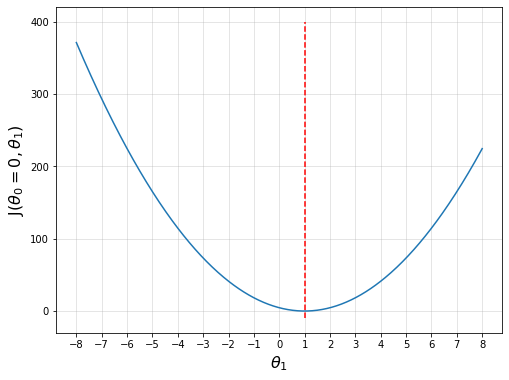

In [6]:
fig = plt.figure(figsize=(8,6))
th1 = np.linspace(-8,8,500)
costfunc = [cost(th1[i], 0, df['X_1'], df['Y']) for i in range(0, len(th1))]
plt.plot(th1, costfunc)
plt.vlines(minimum.x[0],-10,400, colors = 'red', linestyles = 'dashed')
plt.xlabel("$\\theta_1$", fontsize=16)
plt.ylabel("J($\\theta_0 = 0, \\theta_1$)", fontsize=16)
plt.xticks(np.arange(-8,9,1))
plt.grid(alpha = 0.4)
plt.show()

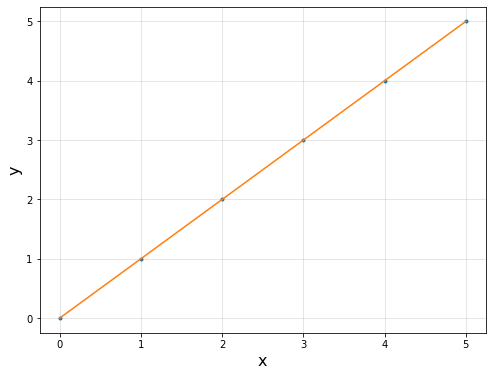

In [7]:
fig = plt.figure(figsize=(8,6))
x = np.linspace(0,5,1000)

plt.plot(df['X_1'], df['Y'], '.')
plt.plot(x, x*minimum.x[0])
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.xticks(np.arange(0,6,1))
plt.grid(alpha = 0.4)
plt.show()

### 4.

In [8]:
th0 = np.linspace(-3,3,100)
th1 = np.linspace(-3,3,100)

tt0, tt1 = np.meshgrid(th0,th1)

J = np.zeros((100,100))

for i,t1 in enumerate(tt0):
    for j,t2 in enumerate(tt1): 
        J[i,j] = cost(t1[i],t2[j],df['X_1'],df['Y'])

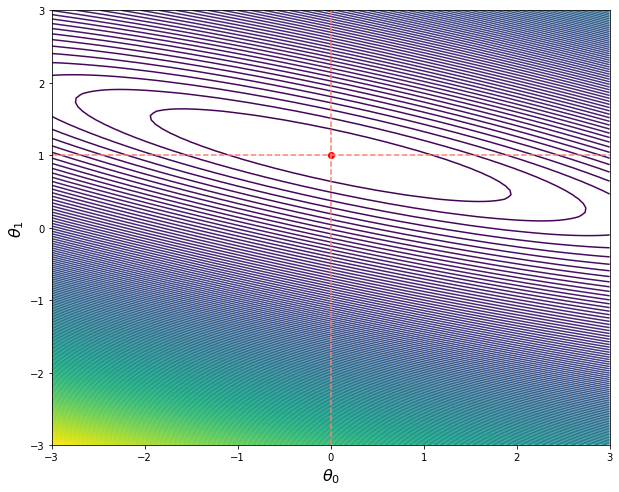

In [9]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
ax.contour(tt0, tt1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$", fontsize=16)
ax.set_ylabel("$\\theta_1$", fontsize=16)
plt.xticks(np.arange(-3,4,1))
plt.yticks(np.arange(-3,4,1))
plt.vlines(0,-3,3, color = 'salmon', linestyles = 'dashed')
plt.hlines(1,-3,3, color = 'salmon', linestyles = 'dashed')
plt.scatter(0,1, color = 'red')
plt.show()

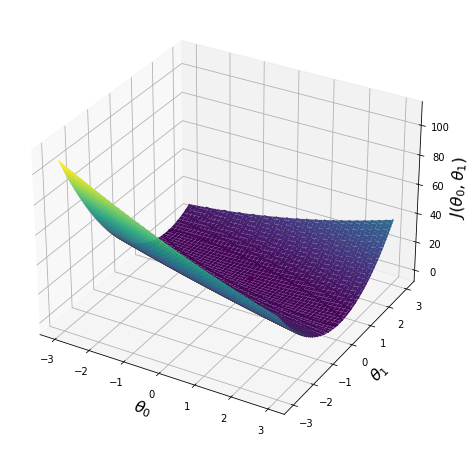

In [32]:
%matplotlib inline 
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection = '3d')

ax.plot_surface(tt0, tt1, J , cmap = 'viridis')
ax.contour(tt0, tt1, J, 80,   cmap = 'gist_gray', linestyles="solid", alpha = 1)

ax.set_xlabel("$\\theta_0$", fontsize=16)
ax.set_ylabel("$\\theta_1$", fontsize=16)
ax.set_zlabel("$J(\\theta_0, \\theta_1)$", fontsize=16)

ax.scatter(0,1,0, color = 'red')
plt.show()

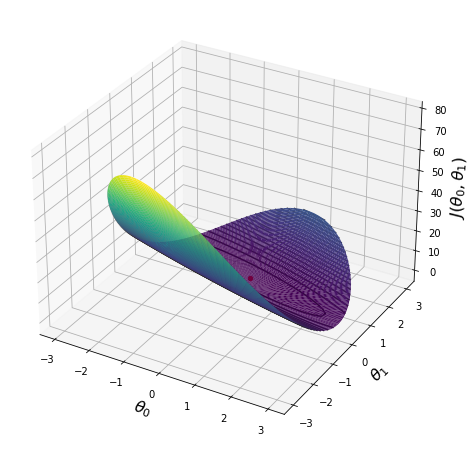

In [33]:
fig = plt.figure(figsize=(10,8))

dim = 100
r = np.linspace(0, 3, dim)
theta = np.linspace(-np.pi, np.pi, dim)

xx = np.zeros((dim,dim))
yy = np.zeros((dim,dim))
J1 = np.zeros((dim,dim))

for i in range(0,dim):
    for j in range(0,dim):
        xx[i,j] = r[i] * np.sin(theta[j])
        yy[i,j] = r[i] * np.cos(theta[j])
        J1[i,j] = cost(r[i] * np.sin(theta[j]), r[i] * np.cos(theta[j]) ,df['X_1'],df['Y'])

ax = plt.axes(projection='3d')
ax.plot_surface(yy, xx, J1, rstride=1, cstride=1, cmap='viridis')
ax.contour(yy, xx, J1, 80,   cmap = 'gist_gray', linestyles="solid", alpha = 1)

ax.scatter(0,1,0, color = 'red')
ax.set_xlabel("$\\theta_0$",fontsize=16)
ax.set_ylabel("$\\theta_1$", fontsize=16)
ax.set_zlabel("$J(\\theta_0, \\theta_1)$", fontsize=16)

plt.show()

# 5. 

Funciones de coste teóricas
\begin{equation}
\end{equation}
1D:

\begin{equation}
J(\theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_1 X)- y^{(i)}  )^2
\end{equation}

2D:
\begin{equation}
J(\theta_0, \theta_1)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)}  )^2
\end{equation}

# Gradiente Descendente

### 6.

In [34]:
%matplotlib inline 

In [35]:
def f(x):
    return (x-4)**2

In [36]:
# Función de gradiente descendente

def GradDesc1D(function):
    # Número aleatorio entre -10 y 10
    winit = random.randrange(-10,10)
    # Learning rate
    alpha = 0.01

    # Paso actual
    wi = winit
    # Paso anterior
    wbefore = wi
    # Paso siguiente
    wj = winit - alpha*derivative(function, winit)

    WJSAVE = []
    
    # Algoritmo de gradiente descendente
    while (f(wbefore) > f(wj)):
        wj = wi - alpha*derivative(function, wi)
        wbefore = wi
        wi = wj
        WJSAVE.append(wj)
        
    return [wj,np.array(WJSAVE)]

In [37]:
sol = GradDesc1D(f)
print("Mínimo de la función f(x) = (x-4)² mediante gradiente descendente: ", sol[0])

Mínimo de la función f(x) = (x-4)² mediante gradiente descendente:  4.000000000000021


In [38]:
xgrad = np.array(sol[1])
ygrad = np.array(f(np.array(sol[1])))

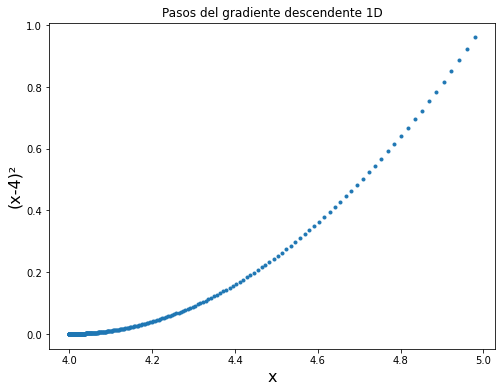

In [39]:
fig = plt.figure(figsize=(8,6))
plt.plot(xgrad, ygrad, '.')
plt.xlabel("x",fontsize=16)
plt.ylabel("(x-4)²", fontsize=16)
plt.title("Pasos del gradiente descendente 1D")
plt.show()

### 7.

In [61]:
# Gradiente descendente 2D. Recibe una función numérica y un valor interval tal que se
#                            escoge el punto inicial en [-intervalo, intervalo]X[-intervalo, intervalo]

def GradDesc2D(function, interval):
    
    # Número aleatorio entre -10 y 10
    winitx = random.randrange(-interval,interval)
    winity = random.randrange(-interval,interval)

    # Learning rate
    alpha = 0.01

#--------------------------------------------------------------------
    # Derivadas
    x = sy.Symbol('x')
    y = sy.Symbol('y')
    DFxSymb = sy.diff(function(x,y), x)
    DFySymb = sy.diff(function(x,y), y)
    
    # Funciones numéricas
    F = sy.lambdify([x,y], function(x,y), "numpy")    
    DFxNum = sy.lambdify([x,y], DFxSymb, "numpy")  
    DFyNum = sy.lambdify([x,y], DFySymb, "numpy") 
#--------------------------------------------------------------------

    # Paso actual en x
    wix = winitx
    # Paso actual en y
    wiy = winity
    
    # Paso anterior en x
    wbeforex = wix
    # Paso anterior en y
    wbeforey = wiy
    
    # Paso siguiente en x    
    wjx = winitx - alpha*DFxNum(winitx, winity)
    # Paso siguiente en y
    wjy = winity - alpha*DFyNum(winitx, winity)

    
    
    WXSAVE = []
    WYSAVE = []

    
    # Algoritmo de gradiente descendente
    while (F(wbeforex, wbeforey) > F(wjx, wjy)):
        
        # Pasos siguientes 
        wjx = wix - alpha*DFxNum(wix, wiy)
        wjy = wiy - alpha*DFyNum(wix, wiy)
        
        # Pasos anteriores
        wbeforex = wix
        wbeforey = wiy
        
        # Se actualizan los pasos actuales
        wix = wjx 
        wiy = wjy
        
        # Se guarda la trayectoria
        WXSAVE.append(wjx)
        WYSAVE.append(wjy)

    return [wjx, wjy, WXSAVE, WYSAVE]
    

 ### Ejemplo 1
\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

In [62]:
# Función simbólica

def SymbolicF(x,y):
    x = sy.Symbol('x')
    y = sy.Symbol('y')
    return sy.sin(x**2/2 - y**2/4 + 3)*sy.cos(2*x + 1 - sy.exp(y))

In [63]:
# Función numérica

x = sy.Symbol('x')
y = sy.Symbol('y')
F = sy.lambdify([x,y], SymbolicF(x,y), "numpy")

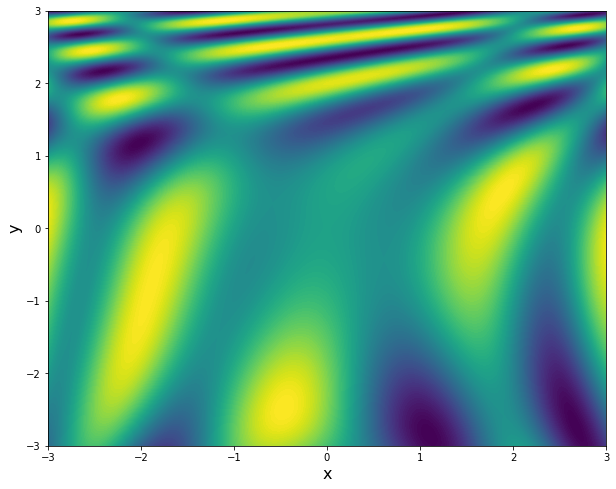

In [64]:
# Gráfica de contorno

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

interval = 3
x = np.linspace(-interval,interval,1000)
y = np.linspace(-interval,interval,1000)
xx, yy = np.meshgrid(x, y)

ax.contourf(xx,yy, F(xx,yy), 100)
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

plt.show()

<IPython.core.display.Javascript object>


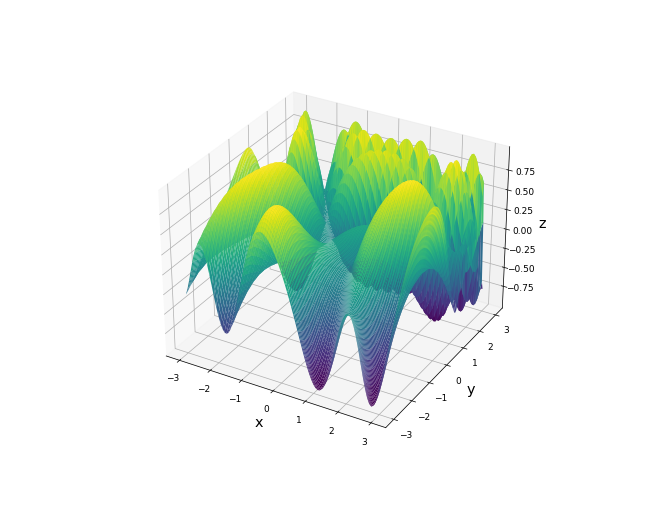

In [65]:
%matplotlib notebook 

# Gráfica de superficie

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = np.linspace(-interval,interval,100)
y = np.linspace(-interval,interval,100)
xx, yy = np.meshgrid(x, y)
zz = F(xx,yy)

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel("x",fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_zlabel("z", fontsize=16)

plt.show()

In [66]:
# Gradiente descendente 2D
Gradtest = GradDesc2D(SymbolicF,interval)

El mínimo calculado es ( 2.6742007846125846 , -2.7300445873555645 )


<IPython.core.display.Javascript object>


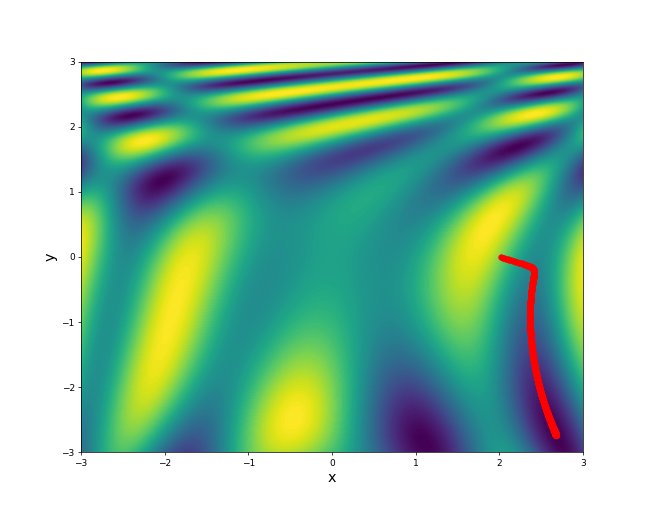

In [67]:
print("El mínimo calculado es (",Gradtest[0], "," ,Gradtest[1], ")")

# Gráfica de contorno
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

interval = 3
x = np.linspace(-interval,interval,1000)
y = np.linspace(-interval,interval,1000)
xx, yy = np.meshgrid(x, y)

ax.contourf(xx,yy, F(xx,yy), 100)
ax.scatter(Gradtest[2], Gradtest[3], color = 'red')

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

plt.show()

<IPython.core.display.Javascript object>


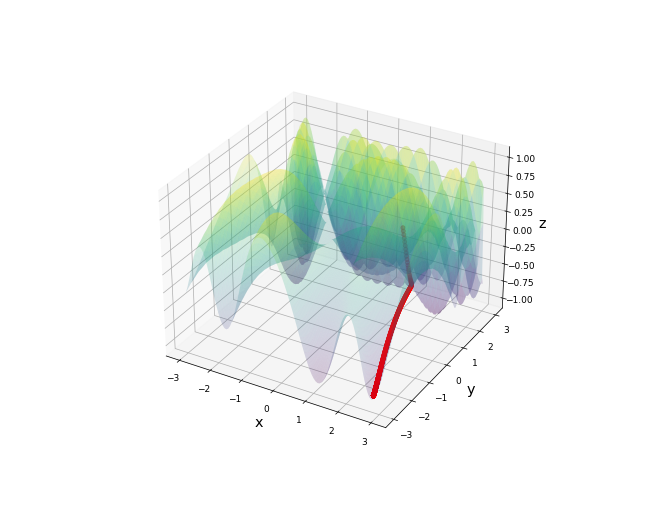

In [68]:
%matplotlib notebook  

# Gráfica 3D
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = np.linspace(-interval,interval,100)
y = np.linspace(-interval,interval,100)
xx, yy = np.meshgrid(x, y)
zz = F(xx,yy)

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis', alpha = 0.2)

ax.scatter3D(Gradtest[2], Gradtest[3], F(np.array(Gradtest[2]), np.array(Gradtest[3])), color = 'red')


ax.set_xlabel("x",fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_zlabel("z", fontsize=16)

plt.show()

### Ejemplo 2

\begin{equation}
F(x,y) = \frac{x^2}{4} + y^2
\end{equation}

In [48]:
# Función simbólica
def Paraboloid(x,y):
    x = sy.Symbol('x')
    y = sy.Symbol('y')
    return x**2/4 + y**2

# Función numérica
x = sy.Symbol('x')
y = sy.Symbol('y')
ParaboloidNum = sy.lambdify([x,y], Paraboloid(x,y), "numpy")

In [49]:
# Gradiente descendente 2D
Gradtest1 = GradDesc2D(Paraboloid,interval)

El mínimo calculado es ( -4.77507874363849e-161 , 1.2e-322 )


<IPython.core.display.Javascript object>


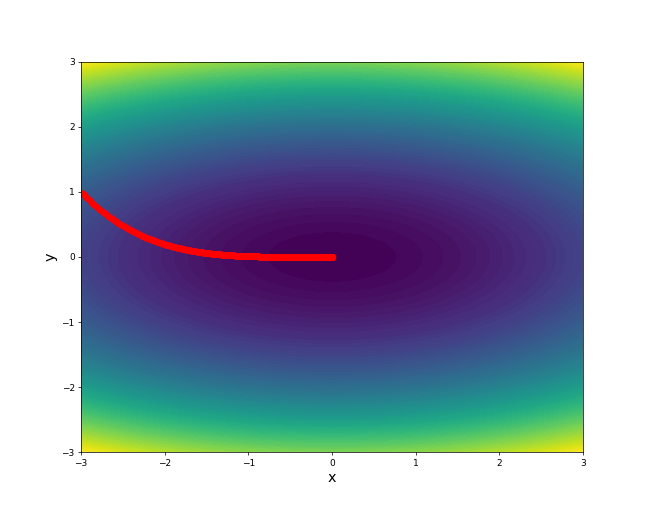

In [50]:
print("El mínimo calculado es (",Gradtest1[0], "," ,Gradtest1[1], ")")

# Gráfica de contorno
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

interval = 3
x = np.linspace(-interval,interval,1000)
y = np.linspace(-interval,interval,1000)
xx, yy = np.meshgrid(x, y)

ax.contourf(xx,yy, ParaboloidNum(xx,yy), 100)
ax.scatter(Gradtest1[2], Gradtest1[3], color = 'red')

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

plt.show()

<IPython.core.display.Javascript object>


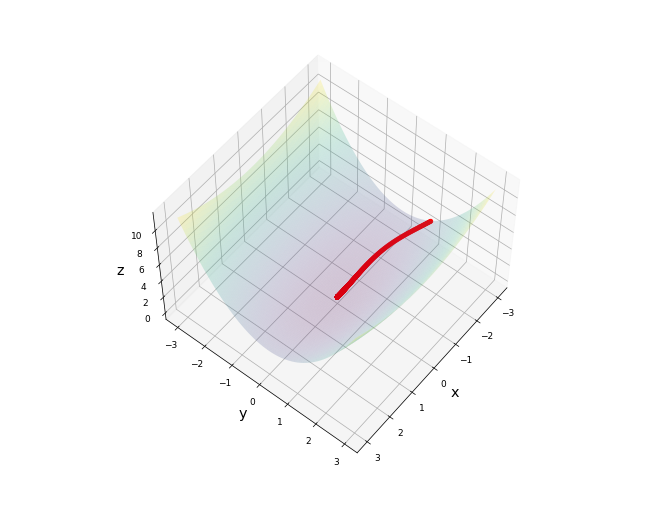

In [60]:
%matplotlib notebook  

# Gráfica 3D
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = np.linspace(-interval,interval,100)
y = np.linspace(-interval,interval,100)
xx, yy = np.meshgrid(x, y)
zz = ParaboloidNum(xx,yy)

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap='viridis', alpha = 0.2)

ax.scatter3D(Gradtest1[2], Gradtest1[3], ParaboloidNum(np.array(Gradtest1[2]), np.array(Gradtest1[3])), color = 'red')


ax.set_xlabel("x",fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_zlabel("z", fontsize=16)

plt.show()

# Modelo de *machine learning*: Solución general


In [25]:
# Gradiente descendente 2D. Recibe una función numérica, guess1 y guess2
                                    # los cuales inicializan el proceso de las dos variables 

def NEWGradDesc2D(function, guess1, guess2):
    
    # Número aleatorio entre guess-10 y guess+10
    winitx = random.uniform(guess1-10,guess1+10)
    winity = random.uniform(guess2-10,guess2+10)

    # Learning rate
    alpha = 0.01

#--------------------------------------------------------------------
    # Derivadas
    x = sy.Symbol('x')
    y = sy.Symbol('y')
    DFxSymb = sy.diff(function(x,y), x)
    DFySymb = sy.diff(function(x,y), y)
    
    # Funciones numéricas
    F = sy.lambdify([x,y], function(x,y), "numpy")    
    DFxNum = sy.lambdify([x,y], DFxSymb, "numpy")  
    DFyNum = sy.lambdify([x,y], DFySymb, "numpy") 
#--------------------------------------------------------------------

    # Paso actual en x
    wix = winitx
    # Paso actual en y
    wiy = winity
    
    # Paso anterior en x
    wbeforex = wix
    # Paso anterior en y
    wbeforey = wiy
    
    # Paso siguiente en x    
    wjx = winitx - alpha*DFxNum(winitx, winity)
    # Paso siguiente en y
    wjy = winity - alpha*DFyNum(winitx, winity)

    
    
    WXSAVE = []
    WYSAVE = []

    
    # Algoritmo de gradiente descendente
    while (F(wbeforex, wbeforey) > F(wjx, wjy)):
        
        # Pasos siguientes 
        wjx = wix - alpha*DFxNum(wix, wiy)
        wjy = wiy - alpha*DFyNum(wix, wiy)
        
        # Pasos anteriores
        wbeforex = wix
        wbeforey = wiy
        
        # Se actualizan los pasos actuales
        wix = wjx 
        wiy = wjy
        
        # Se guarda la trayectoria
        WXSAVE.append(wjx)
        WYSAVE.append(wjy)

    return [wjx, wjy, WXSAVE, WYSAVE]
    
#==============================================================================================================
    
# Función para ajuste lineal de datos x y y. mguess: Pendiente aproximada. bguess: Intercepto aproximado.

def LinearReg(x, y, mguess, bguess):
    
    # Simbolos de los parámetros theta1 y theta2
    th1 = sy.Symbol('th1')
    th0 = sy.Symbol('th0')

    # Función de coste simbólica 
    
    def SymbolicCost(th1,th0):
        return 1/(2*len(y))*np.dot( ( th0 + th1*x - y ),( th0 + th1*x - y ) )
    
    # Parámetros óptimos
    opt = NEWGradDesc2D(SymbolicCost, mguess, bguess)
        
    return [opt[0], opt[1]]

In [26]:
x = np.linspace(0, 1, 100)
y = 0.2 + 0.2*x + 0.02*np.random.random(100)

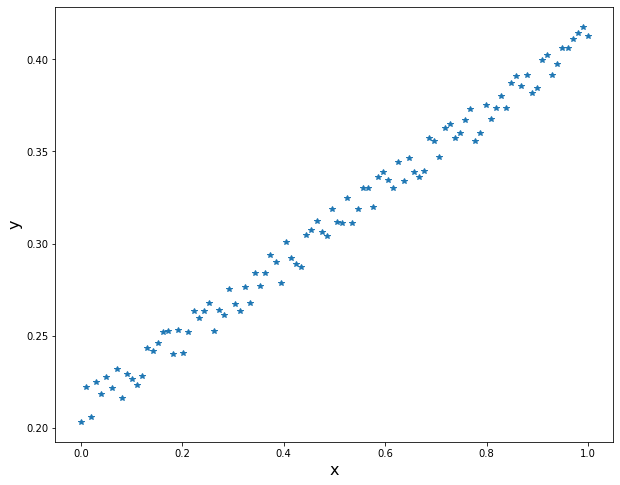

In [59]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.plot(x,y, '*')

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)

plt.show()

In [43]:
# Ajuste usando las funciones desarrolladas
res = LinearReg(x, y, 5, 3)
res

[0.20303449623009293, 0.2100950129721378]

In [47]:
# Ajuste usando sklearn
model = LinearRegression().fit(x.reshape((-1, 1)), y)
skres = [model.coef_[0] ,model.intercept_]
skres

[0.20303452391970503, 0.21009499813232707]

In [53]:
# Diferencias
print('Se tiene una diferencia de [', abs(res[0] - skres[0]),',',res[1] - skres[1],'] entre los dos métodos') 

Se tiene una diferencia de [ 2.768961210319887e-08 , 1.4839810741351656e-08 ] entre los dos métodos


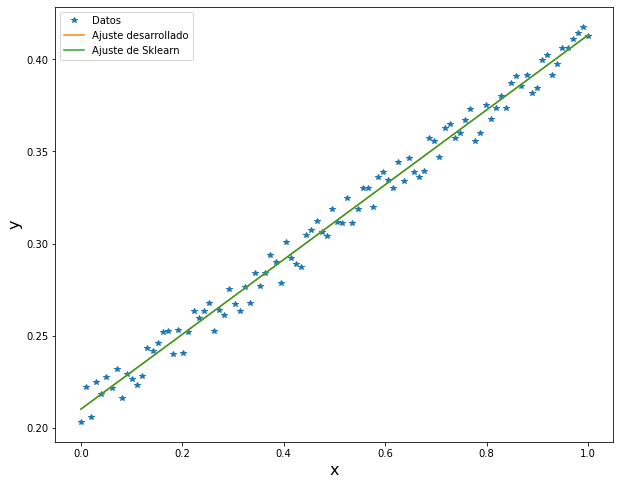

In [60]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.plot(x,y, '*',label= 'Datos')
plt.plot(x,x*res[0]+res[1], label= 'Ajuste desarrollado')
plt.plot(x,x*skres[0]+skres[1], label= 'Ajuste de Sklearn')

ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
plt.legend()

plt.show()